# Coursework 1 of the COMP0051 Algorithmic Trading

## Time Series [10 Points]

1. Download two ETF time series using an API. The length of the time series T , with T =
300 and a daily resolution.


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 300 days of data
start_date = '2020-01-01'
end_date = '2021-03-12'

# Get the data for the stock AAPL and NVDA
data = yf.download('AAPL NVDA', start=start_date, end=end_date)

# print the length of the data
print(len(data))

# print the first 5 rows of the data
print(data.head())

[*********************100%%**********************]  2 of 2 completed

300
            Adj Close                 Close                  High             \
                 AAPL       NVDA       AAPL       NVDA       AAPL       NVDA   
Date                                                                           
2020-01-02  73.059433  59.744034  75.087502  59.977501  75.150002  59.977501   
2020-01-03  72.349121  58.787785  74.357498  59.017502  75.144997  59.457500   
2020-01-06  72.925644  59.034313  74.949997  59.264999  74.989998  59.317501   
2020-01-07  72.582664  59.749023  74.597504  59.982498  75.224998  60.442501   
2020-01-08  73.750244  59.861095  75.797501  60.095001  76.110001  60.509998   

                  Low                  Open                Volume            
                 AAPL       NVDA       AAPL       NVDA       AAPL      NVDA  
Date                                                                         
2020-01-02  73.797501  59.180000  74.059998  59.687500  135480400  23753600  
2020-01-03  74.125000  58.525002  74.287498

2. Plot the price time series

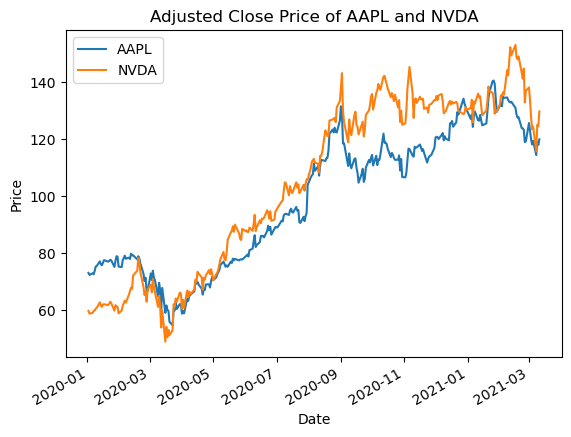

In [2]:
# plot the adjusted close price of each stock
data['Adj Close'].plot()
plt.title('Adjusted Close Price of AAPL and NVDA')
plt.ylabel('Price')
plt.show()

In [3]:
# plot the candlestick chart of each stock
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open']['AAPL'],
                high=data['High']['AAPL'],
                low=data['Low']['AAPL'],
                close=data['Close']['AAPL'])])

fig.update_layout(
    title='Candlestick Chart of AAPL',
    yaxis_title='AAPL Price',
    xaxis_title='Date',
    width=600,
    height=800
)

fig.show()

fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open']['NVDA'],
                high=data['High']['NVDA'],
                low=data['Low']['NVDA'],
                close=data['Close']['NVDA'])])

fig.update_layout(
    title='Candlestick Chart of NVDA',
    yaxis_title='NVDA Price',
    xaxis_title='Date',
    width=600,
    height=800
)

fig.show()

## Moving averages [20 Points]

3. Define mathematically the moving average of the price time series with an arbitrary time window τ
4. Compute three moving averages of the price time series, with time-windows τ = 5, 20, 60

In [5]:
# compute moving average with window size of 5,20, 60 for AAPL
ma5_AAPL = data['Adj Close']['AAPL'].rolling(window=5).mean()
ma20_AAPL = data['Adj Close']['AAPL'].rolling(window=20).mean()
ma60_AAPL = data['Adj Close']['AAPL'].rolling(window=60).mean()

# compute moving average with window size of 5, 20, 60 for NVDA
ma5_NVDA = data['Adj Close']['NVDA'].rolling(window=5).mean()
ma20_NVDA = data['Adj Close']['NVDA'].rolling(window=20).mean()
ma60_NVDA = data['Adj Close']['NVDA'].rolling(window=60).mean()


5. plot the moving averages against the price time series

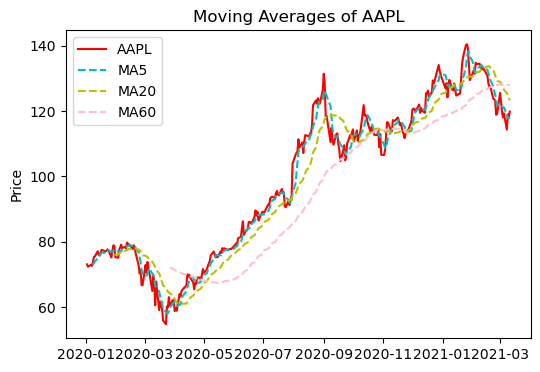

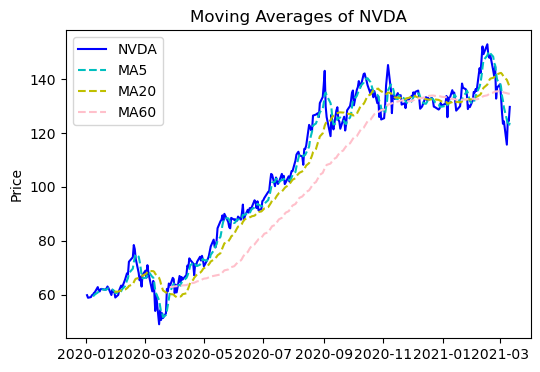

In [6]:
# plot the moving averages against the adjusted close price
plt.figure(figsize=(6,4))
plt.plot(data['Adj Close']['AAPL'], label='AAPL', color='r', )
plt.plot(ma5_AAPL, label='MA5', color='c', linestyle='--')
plt.plot(ma20_AAPL, label='MA20', color='y', linestyle='--')
plt.plot(ma60_AAPL, label='MA60', color='pink', linestyle='--')
plt.title('Moving Averages of AAPL')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(data['Adj Close']['NVDA'], label='NVDA', color='b', )
plt.plot(ma5_NVDA, label='MA5', color='c', linestyle='--')
plt.plot(ma20_NVDA, label='MA20', color='y', linestyle='--')
plt.plot(ma60_NVDA, label='MA60', color='pink', linestyle='--')
plt.title('Moving Averages of NVDA')
plt.ylabel('Price')
plt.legend()
plt.show()

6. Compute the linear and log-return of the price time series
7. Plot the linear return against the log-return time series

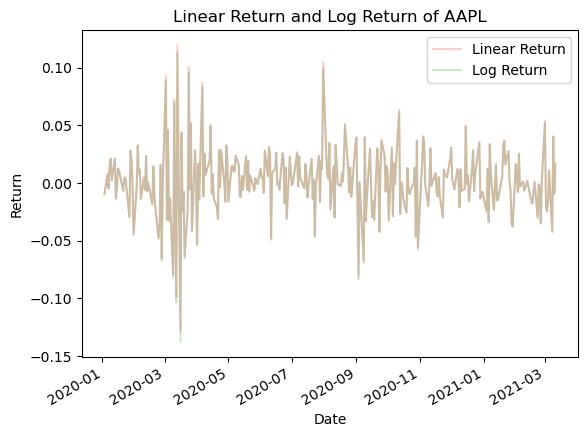

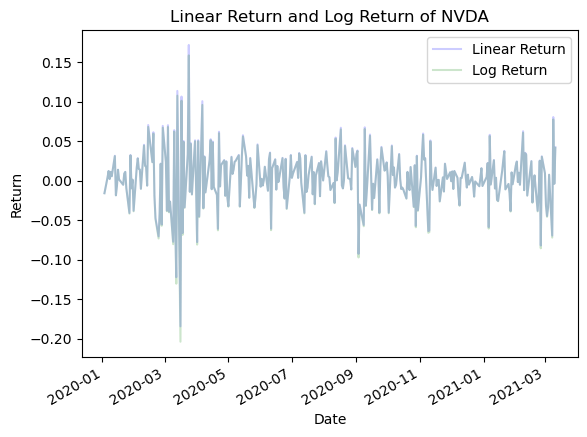

In [32]:
# compute the linear return and log return for AAPL
return_AAPL = data['Adj Close']['AAPL'].pct_change()
log_return_AAPL = np.log(data['Adj Close']['AAPL']/data['Adj Close']['AAPL'].shift(1))

return_AAPL.plot(color='r', alpha=0.2, label='Linear Return')
log_return_AAPL.plot(color='g', alpha=0.2, label='Log Return')
plt.title('Linear Return and Log Return of AAPL')
plt.ylabel('Return')
plt.legend()
plt.show()

# compute the linear return and log return for NVDA
return_NVDA = data['Adj Close']['NVDA'].pct_change()
log_return_NVDA = np.log(data['Adj Close']['NVDA']/data['Adj Close']['NVDA'].shift(1))

return_NVDA.plot(color='b', alpha=0.2, label='Linear Return')
log_return_NVDA.plot(color='g', alpha=0.2, label='Log Return')
plt.title('Linear Return and Log Return of NVDA')
plt.ylabel('Return')
plt.legend()
plt.show()

## Time Series Analysis

8. Deﬁne the auto-correlation function (for a stationary time-series)
9. Compute the auto-correlation functions (ACF) of the price time series
10. Plot the price ACFs

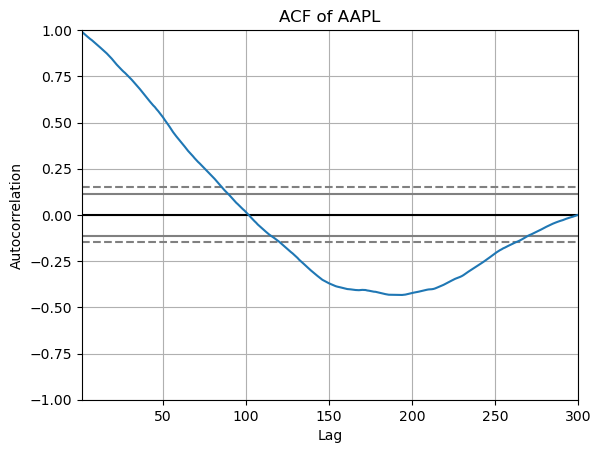

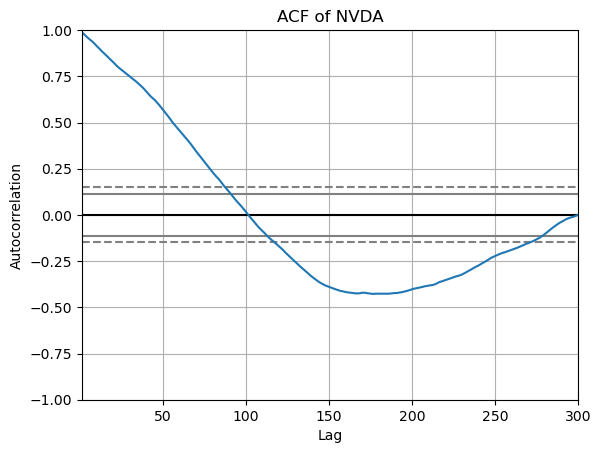

In [13]:
# Plot the ACF of AAPL
pd.plotting.autocorrelation_plot(data['Adj Close']['AAPL'])
plt.title('ACF of AAPL')
plt.show()

# Plot the ACF of NVDA
pd.plotting.autocorrelation_plot(data['Adj Close']['NVDA'])
plt.title('ACF of NVDA')
plt.show()

11. Compute the partial auto-correlation functions (PACF) of the price time series
12. Plot the price PACFs

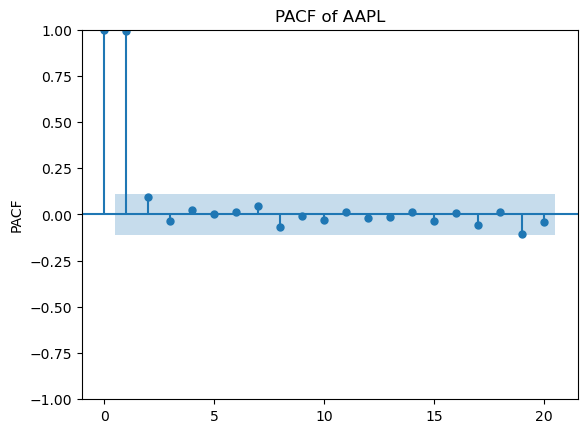

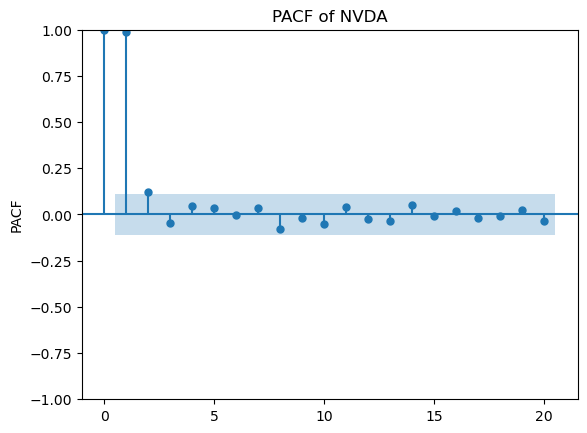

In [14]:
# Plot the PACF of AAPL
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Adj Close']['AAPL'], lags=20)
plt.title('PACF of AAPL')
plt.ylabel('PACF')
plt.show()

# Plot the PACF of NVDA
plot_pacf(data['Adj Close']['NVDA'], lags=20)
plt.title('PACF of NVDA')
plt.ylabel('PACF')
plt.show()

13. Compute the auto-correlation function (ACF) of the return time series
14. Plot the return ACFs

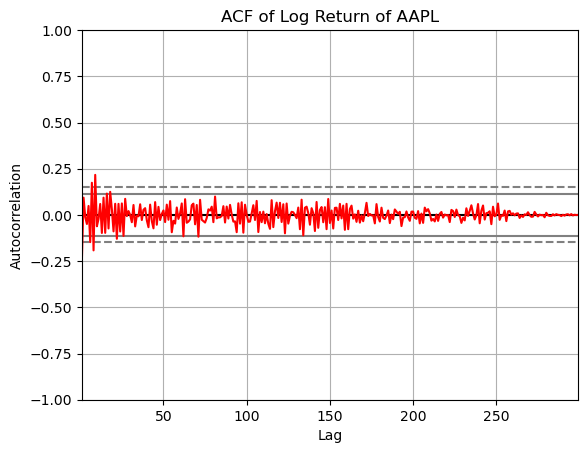

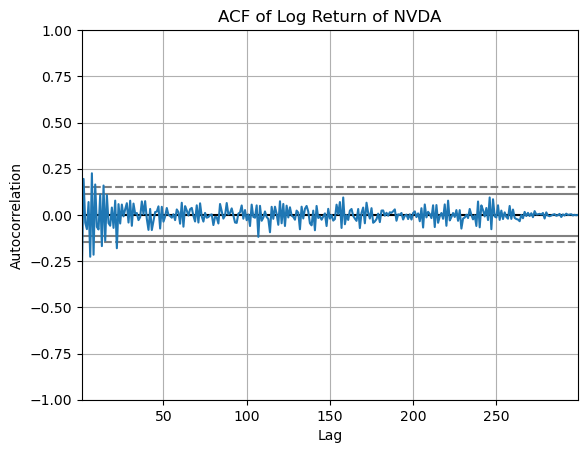

In [39]:
# Plot the ACF of the log return of AAPL
log_return_AAPL = log_return_AAPL.dropna()
pd.plotting.autocorrelation_plot(return_AAPL, color='r')
plt.title('ACF of Log Return of AAPL')
plt.show()

# Plot the ACF of the log return of NVDA
log_return_NVDA = log_return_NVDA.dropna()
pd.plotting.autocorrelation_plot(log_return_NVDA)
plt.title('ACF of Log Return of NVDA')
plt.show()

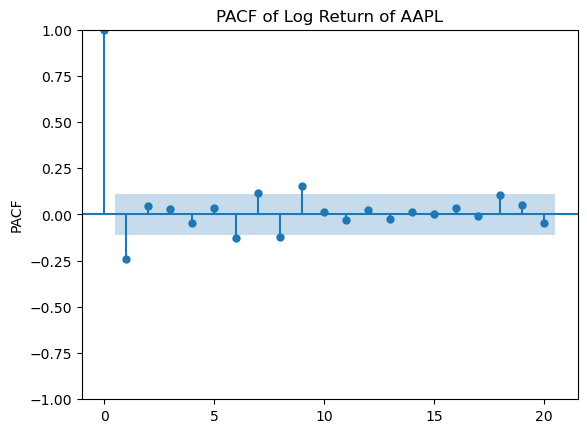

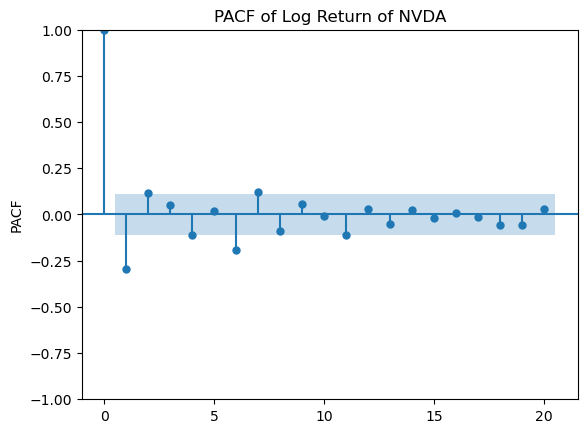

In [40]:
# Plot the PACF of the log return of AAPL
plot_pacf(log_return_AAPL, lags=20)
plt.title('PACF of Log Return of AAPL')
plt.ylabel('PACF')
plt.show()

# Plot the PACF of the log return of NVDA
plot_pacf(log_return_NVDA, lags=20)
plt.title('PACF of Log Return of NVDA')
plt.ylabel('PACF')
plt.show()

## Gaussianity and Stationarity test
17. Introduce mathematically a Gaussianity test
18. Perform a Gaussianity test of the return time series

In [41]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

seed(1)

# normality test for AAPL
stat, p = shapiro(log_return_AAPL)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# normality test for NVDA
stat, p = shapiro(log_return_NVDA)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.946, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.948, p=0.000
Sample does not look Gaussian (reject H0)


19. Introduce mathematically a stationarity test
20. Perform a stationarity test of the return time series

In [42]:
# stationarity test for AAPL log return
from statsmodels.tsa.stattools import adfuller

result = adfuller(log_return_AAPL)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# stationarity test for NVDA log return
result = adfuller(log_return_NVDA)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -5.278435
p-value: 0.000006
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
ADF Statistic: -6.863883
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


## Conintegration

21. Define mathematically a cointegration test
22. Perform a cointegration test of the two ETF price time series

Cointegration test p-value:  0.21422850640477198
The two stocks are not cointegrated


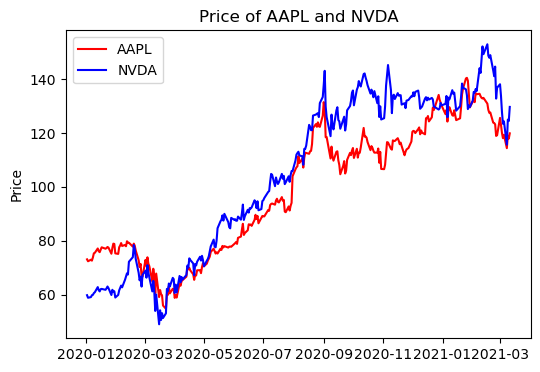

In [43]:
# compute cointegration test for AAPL and NVDA
from statsmodels.tsa.stattools import coint

score, pvalue, _ = coint(data['Adj Close']['AAPL'], data['Adj Close']['NVDA'])
print('Cointegration test p-value: ', pvalue)

confidence_level = 0.05
if pvalue < confidence_level:
    print('The two stocks are cointegrated')
else:
    print('The two stocks are not cointegrated')

# plot the price of AAPL and NVDA
plt.figure(figsize=(6,4))
plt.plot(data['Adj Close']['AAPL'], label='AAPL', color='r')
plt.plot(data['Adj Close']['NVDA'], label='NVDA', color='b')
plt.title('Price of AAPL and NVDA')
plt.ylabel('Price')
plt.legend()
plt.show()

23. Perform a cointegration test of the two ETF return time series

Cointegration test p-value:  2.1044163015058318e-29
The two stocks are cointegrated


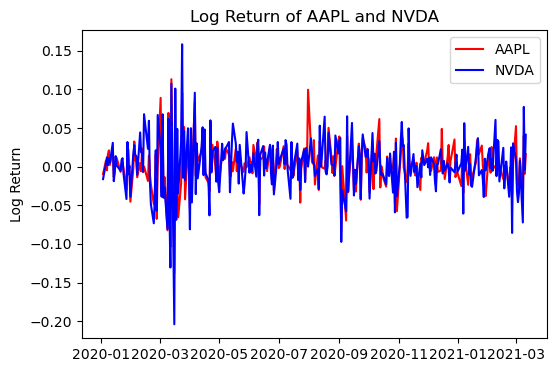

In [44]:
# calculate the cointegration of the log return of AAPL and NVDA
score, pvalue, _ = coint(log_return_AAPL, log_return_NVDA)
print('Cointegration test p-value: ', pvalue)

confidence_level = 0.05
if pvalue < confidence_level:
    print('The two stocks are cointegrated')
else:
    print('The two stocks are not cointegrated')

# plot the log return of AAPL and NVDA
plt.figure(figsize=(6,4))
plt.plot(log_return_AAPL, label='AAPL', color='r')
plt.plot(log_return_NVDA, label='NVDA', color='b')
plt.title('Log Return of AAPL and NVDA')
plt.ylabel('Log Return')    
plt.legend()
plt.show()